In [1]:
import pandas as pd 
import sklearn 
from sklearn.ensemble import BaggingClassifier     
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
#---------------------------------------------------------------------------------
simplify = pd.read_csv('penguins_size.csv') #7 344
full = pd.read_csv('penguins_lter.csv') # 17 344
#---------------------------------------------------------------------------------
test_simplify = simplify.iloc[2::3].copy() # 2 5 8............
##print(test_simplify.index.tolist())
train_index = list(range(0,len(simplify),3)) + list(range(1,len(simplify),3))
train_index = sorted(train_index)
train_simplify = simplify.iloc[train_index].copy() # 0 1 3 4...............
#--------------------------------------------------------------------------------
factor = train_simplify.columns.tolist()
##print(factor)
train_simplify = train_simplify[train_simplify["sex"].isin(["MALE","FEMALE"])] #把sex不是 "MALE","FEMALE"的清掉，同時也清掉NA
train_simplify_x = train_simplify[factor[1:]]
train_simplify_y = train_simplify[factor[0]]
Std = StandardScaler()
train_simplify_x[factor[2:6]] = Std.fit_transform(train_simplify_x[factor[2:6]]) #標準化
train_simplify_x_dummies = pd.get_dummies(train_simplify_x)
##print(train_simplify_x_dummies)
#-------------------------------------------------------------------------------
test_simplify = test_simplify[test_simplify["sex"].isin(["MALE","FEMALE"])] #把sex不是 "MALE","FEMALE"的清掉，同時也清掉NA
test_simplify_x = test_simplify[factor[1:]]
test_simplify_y = test_simplify[factor[0]]
##print(test_simplify_y)
##print(test_simplify_x)
test_simplify_x[factor[2:6]] = Std.fit_transform(test_simplify_x[factor[2:6]]) #標準化
test_simplify_x_dummies = pd.get_dummies(test_simplify_x)
##print(test_simplify_x_dummies)

<ipython-input-2-241638934d40>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_simplify_x[factor[2:6]] = Std.fit_transform(train_simplify_x[factor[2:6]]) #標準化
c:\python37\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-2-241638934d40>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

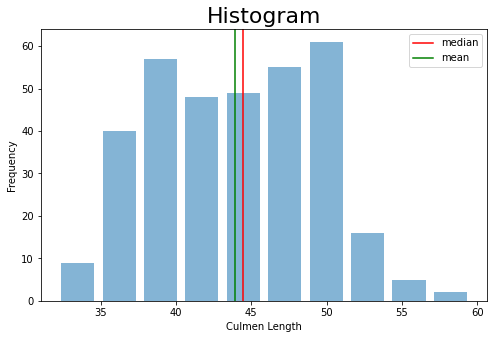

In [5]:
fig, ax = plt.subplots(figsize =(8,5))
ax.hist(simplify[simplify.columns[2]], rwidth=0.8, alpha=0.55 )
ax.axvline(simplify[simplify.columns[2]].median(), color='red')
ax.axvline(simplify[simplify.columns[2]].mean(), color='green')
plt.xlabel("Culmen Length")
plt.ylabel("Frequency")
plt.title("Histogram", size=22)
plt.legend(["median", "mean"], loc ="upper right")

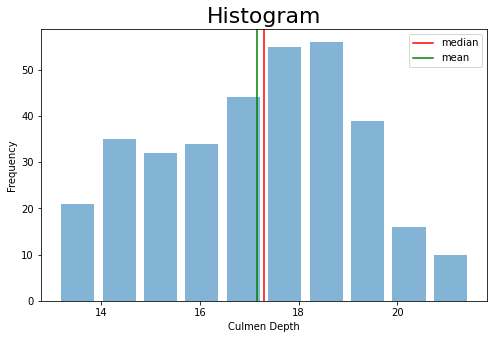

In [6]:
fig, ax = plt.subplots(figsize =(8,5))
ax.hist(simplify[simplify.columns[3]], rwidth=0.8, alpha=0.55 )
ax.axvline(simplify[simplify.columns[3]].median(), color='red')
ax.axvline(simplify[simplify.columns[3]].mean(), color='green')
plt.xlabel("Culmen Depth")
plt.ylabel("Frequency")
plt.title("Histogram", size=22)
plt.legend(["median", "mean"], loc ="upper right")

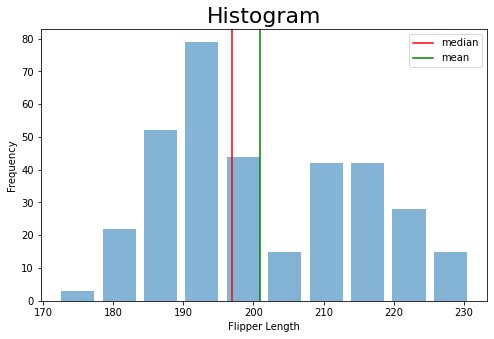

In [7]:
fig, ax = plt.subplots(figsize =(8,5))
ax.hist(simplify[simplify.columns[4]], rwidth=0.8, alpha=0.55 )
ax.axvline(simplify[simplify.columns[4]].median(), color='red')
ax.axvline(simplify[simplify.columns[4]].mean(), color='green')
plt.xlabel("Flipper Length")
plt.ylabel("Frequency")
plt.title("Histogram", size=22)
plt.legend(["median", "mean"], loc ="upper right")

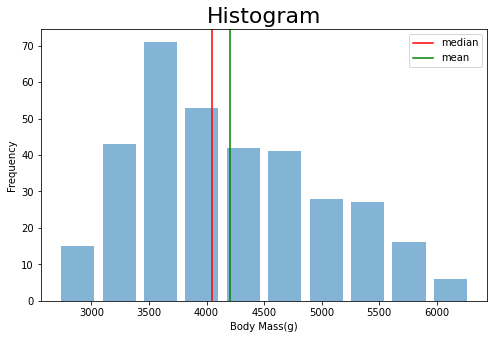

In [8]:
fig, ax = plt.subplots(figsize =(8,5))
ax.hist(simplify[simplify.columns[5]], rwidth=0.8, alpha=0.55)
ax.axvline(simplify[simplify.columns[5]].median(), color='red')
ax.axvline(simplify[simplify.columns[5]].mean(), color='green')
plt.xlabel("Body Mass(g)")
plt.ylabel("Frequency")
plt.title("Histogram", size=22) 
plt.legend(["median", "mean"], loc ="upper right")

c:\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

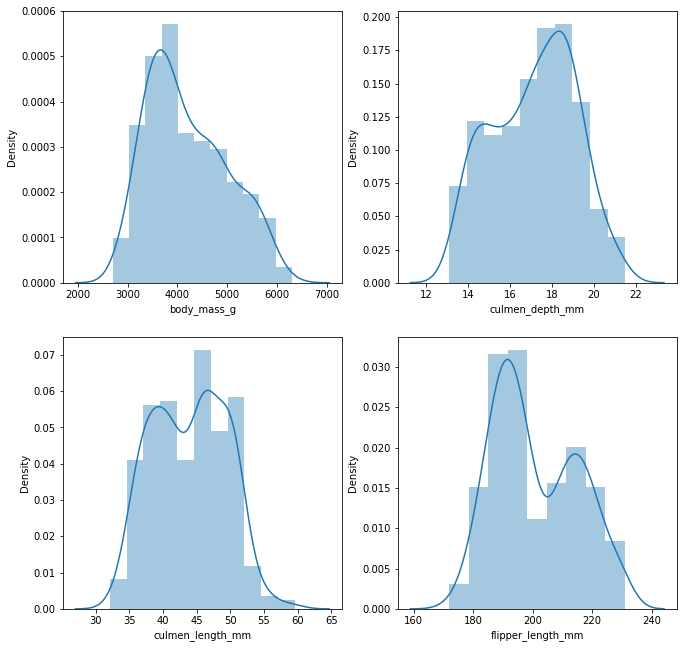

In [11]:
fig, ax2 = plt.subplots(2, 2, figsize=(11,11))
sns.distplot(simplify['body_mass_g'],ax=ax2[0][0])
sns.distplot(simplify['culmen_depth_mm'],ax=ax2[0][1])
sns.distplot(simplify['culmen_length_mm'],ax=ax2[1][0]) 
sns.distplot(simplify['flipper_length_mm'],ax=ax2[1][1])

<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

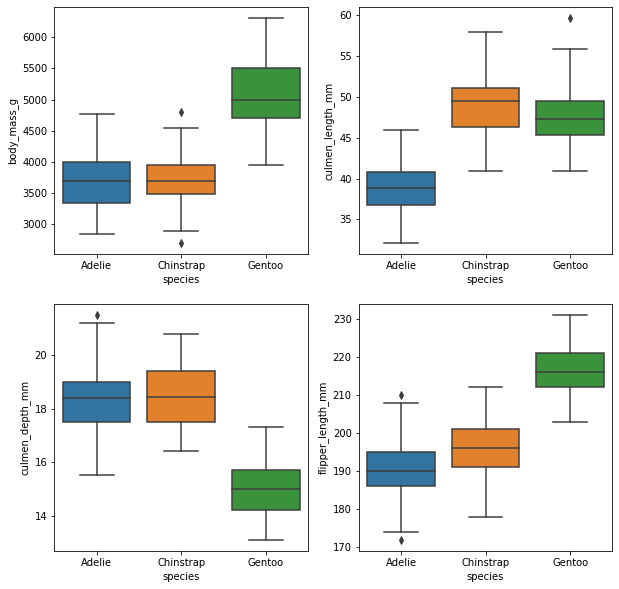

In [12]:
fig, ax2 = plt.subplots(2, 2, figsize=(10, 10))
sns.boxplot(x="species", y="body_mass_g", data= simplify,ax=ax2[0][0])
sns.boxplot(x="species", y="culmen_depth_mm", data= simplify,ax=ax2[1][0])
sns.boxplot(x="species", y="culmen_length_mm", data= simplify,ax=ax2[0][1])
sns.boxplot(x="species", y="flipper_length_mm", data= simplify,ax=ax2[1][1]) 

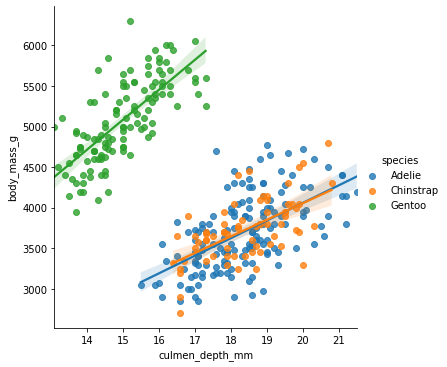

In [13]:
#fig, ax2 = plt.subplots(2, 3, figsize=(10, 10))
sns.lmplot(x="culmen_depth_mm", y="body_mass_g", data= simplify ,hue='species')

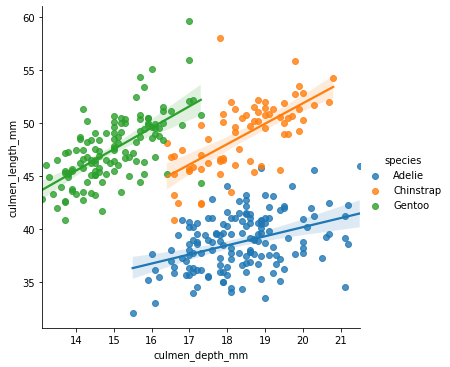

In [14]:
sns.lmplot(x="culmen_depth_mm", y="culmen_length_mm", data= simplify ,hue='species') 

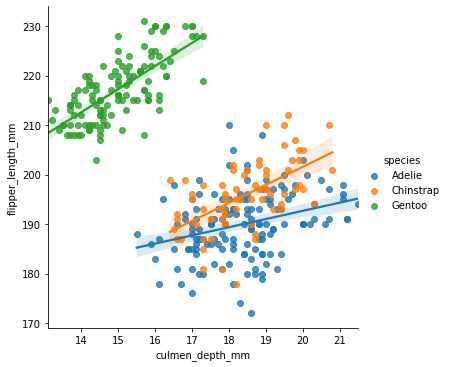

In [15]:
sns.lmplot(x="culmen_depth_mm", y="flipper_length_mm", data= simplify ,hue='species') 

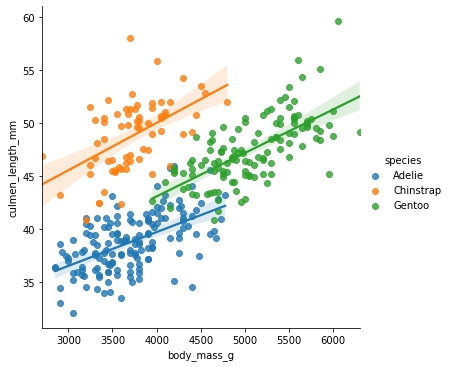

In [16]:
sns.lmplot(x="body_mass_g", y="culmen_length_mm", data= simplify ,hue='species') 

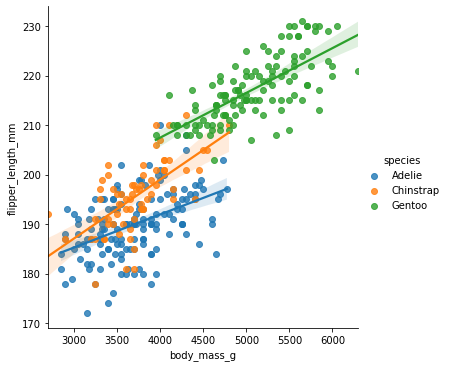

In [17]:
sns.lmplot(x="body_mass_g", y="flipper_length_mm", data= simplify ,hue='species') 

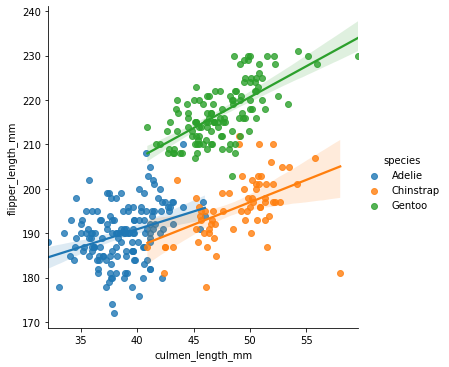

In [18]:
sns.lmplot(x="culmen_length_mm", y="flipper_length_mm", data= simplify ,hue='species') 